# Generate a KMens model for team assignment by jersey color detection

In [29]:
# Import libraries
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans


In [7]:
# Open an image from one of the frames with detected dplayer
image_path = "../output_videos/cropped_image.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

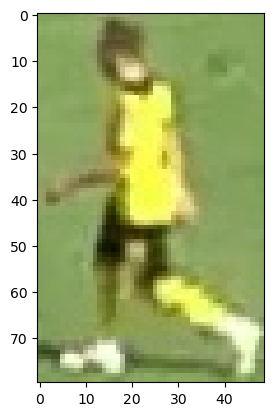

In [11]:
plt.imshow(image)
plt.show()

### Cut the top half of the image because the jersey color is always on top of the image


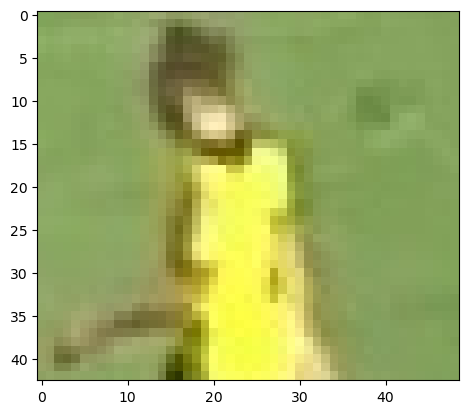

In [24]:
# Cut bottom half off
top_half = image[0: int(image.shape[0]/1.85), :]
plt.imshow(top_half)
plt.show()

### Cluster the image into 2 clusters to define the colors

In [41]:
# Reshape into 2D array
image_2D  = top_half.reshape(-1, 3)


In [43]:
# Perform clustering
kmeans = KMeans(n_clusters =2, random_state=0).fit(image_2D)

In [49]:
# Get the labels
labels = kmeans.labels_

# Reshape the labels
clust_image = labels.reshape(top_half.shape[0], top_half.shape[1])

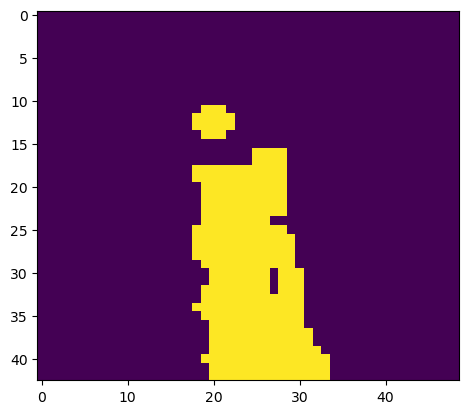

In [51]:
# Display the image
plt.imshow(clust_image)
plt.show()

In [53]:
# Select the corners of the image to assign color cluster of the background
corner_clust = [clust_image[0,0], clust_image[0,-1], clust_image[-1,0], clust_image[-1,-1]]

In [55]:
# assign the cluster
non_player_clust = max(set(corner_clust), key = corner_clust.count)

In [57]:
# Print the cluster for the background
print(non_player_clust)

0


In [59]:
# Create a variable to assign the player color cluster
player_clust = 1 - non_player_clust

In [61]:
# Print the cluster for the player
print(player_clust)

1


In [63]:
# Get the color code for the player jersey
kmeans.cluster_centers_[player_clust]


array([241.5659164 , 239.63987138, 100.64951768])

#### Check if the jersey color is yellow
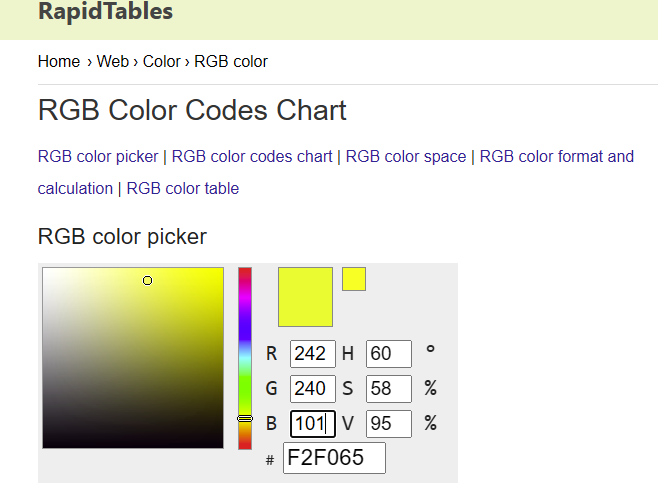